In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
%matplotlib inline

c:\users\sripan\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


training data shape: (42000, 785)
training instance digit: 4


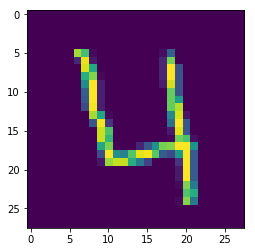

In [22]:
df=pd.read_csv('mnist_train.csv')
print("training data shape:",df.shape)

recordFeature=df.iloc[3,1:].values
recordLabel=df.iloc[3,0]
digit=recordFeature.reshape(28,28).astype('uint8')
print("training instance digit:",recordLabel)
plt.imshow(digit)

In [24]:
X=df.iloc[:,1:]
y=df.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

x_train.shape (33600, 784)
y_train.shape (33600,)
x_test.shape (8400, 784)
y_test.shape (8400,)


In [37]:
x_train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y_train=y_train.reshape(33600,1)
y_test=y_test.reshape(8400,1)

c:\users\sripan\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [30]:
rfClf=RandomForestClassifier(n_estimators=100)
rfClf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
predTrain=rfClf.predict(x_train)
correctPredictionTrain=0
for i in range(len(predTrain)):
    if predTrain[i] == y_train[i]:
        correctPredictionTrain+=1
print("train set accuracy:",correctPredictionTrain/len(y_train))

predTest=rfClf.predict(x_test)
correctPredictionTest=0
for i in range(len(y_test)-1):
    if predTest[i+1]==y_test[i+1]:
        correctPredictionTest+=1
print("test set accuracy:",correctPredictionTest/len(y_test))

train set accuracy: 1.0
test set accuracy: 0.9614285714285714
